### Dataset Information
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

You can get this data from [this website](https://www.openml.org/d/24)

In [1]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix

%matplotlib inline

In [2]:
# load csv into dataframe
df = pd.read_csv('dataset_24_mushroom.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [3]:
# get dataframe number of rows and columns. There are 23 columns and 8124 rows.
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 8124
Number of columns: 23


### Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### EDA

In [4]:
# Check number of missing value
# clear, there are no missing value
df.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [5]:
# information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [6]:
# Statistics per columns
# count : total rows per columns
# unique : total unique value per columns
# top : most occuring value per columns
# freq : total occuring for top value per columns
# let's say for example in column cap-shape there are 8124 rows dan total 6 unique value with x as most occuring with total 3656 value.

df.describe().T

NumExpr defaulting to 8 threads.


,count,unique,top,freq
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608


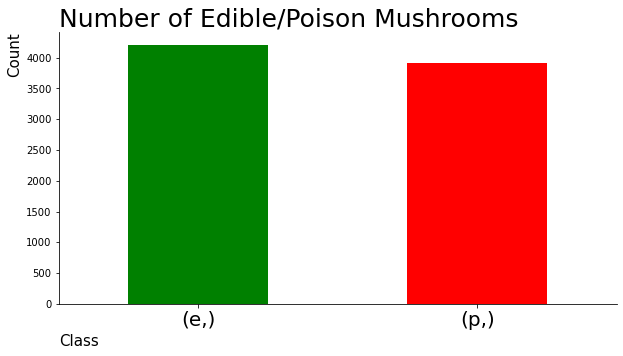

In [7]:
# From total 23 columns. 22 columns from cap-shape until habibat we classified as X and last column(class) as y(target/label)
# We can check from description table above show that there are 2 unique value, we can check another value using value counts
# The 2 value is class 'e' and class 'p'. 'e' for edible and 'p' for poison
# total 'e' 4208 rows and total 'p' 3916 rows

df[['class']].value_counts().plot(kind = 'bar', figsize = (10,5), color=['green', 'red'])
plt.xlabel('Class', fontsize=15, loc='left')
plt.ylabel('Count', fontsize=15, loc='top')
plt.title('Number of Edible/Poison Mushrooms', fontdict={'fontsize':25}, loc='left')
plt.xticks(rotation=0, fontsize=20)
sns.despine()
plt.show()

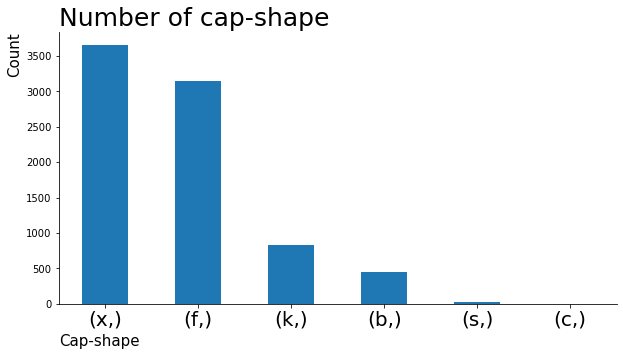

In [8]:
# Cap-shape distribution
df[['cap-shape']].value_counts().plot(kind = 'bar', figsize = (10,5))
plt.xlabel('Cap-shape', fontsize=15, loc='left')
plt.ylabel('Count', fontsize=15, loc='top')
plt.title('Number of cap-shape', fontdict={'fontsize':25}, loc='left')
plt.xticks(rotation=0, fontsize=20)
sns.despine()
plt.show()

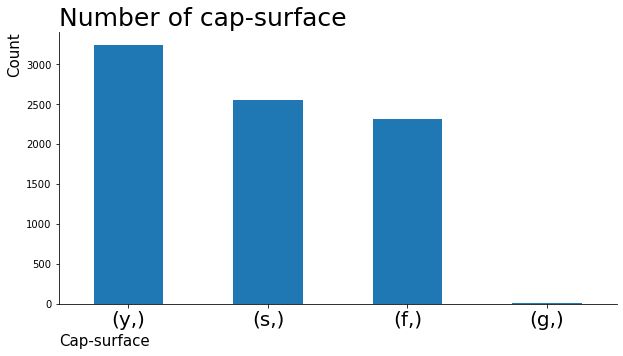

In [9]:
# Cap-surface distribution
df[['cap-surface']].value_counts().plot(kind = 'bar', figsize = (10,5))
plt.xlabel('Cap-surface', fontsize=15, loc='left')
plt.ylabel('Count', fontsize=15, loc='top')
plt.title('Number of cap-surface', fontdict={'fontsize':25}, loc='left')
plt.xticks(rotation=0, fontsize=20)
sns.despine()
plt.show()

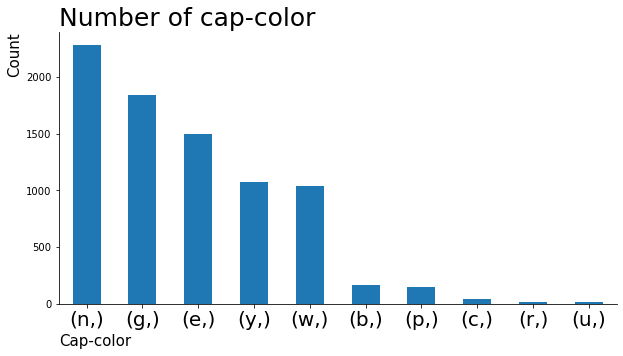

In [10]:
# Cap-color distribution
df[['cap-color']].value_counts().plot(kind = 'bar', figsize = (10,5))
plt.xlabel('Cap-color', fontsize=15, loc='left')
plt.ylabel('Count', fontsize=15, loc='top')
plt.title('Number of cap-color', fontdict={'fontsize':25}, loc='left')
plt.xticks(rotation=0, fontsize=20)
sns.despine()
plt.show()

In [11]:
# change object value to ordinal
df_ordinal = df.copy()
labelencoder = preprocessing.LabelEncoder()
for column in df_ordinal.columns:
    df_ordinal[column] = labelencoder.fit_transform(df_ordinal[column])

In [12]:
df_ordinal.to_excel('dataset_ordinal.xlsx')

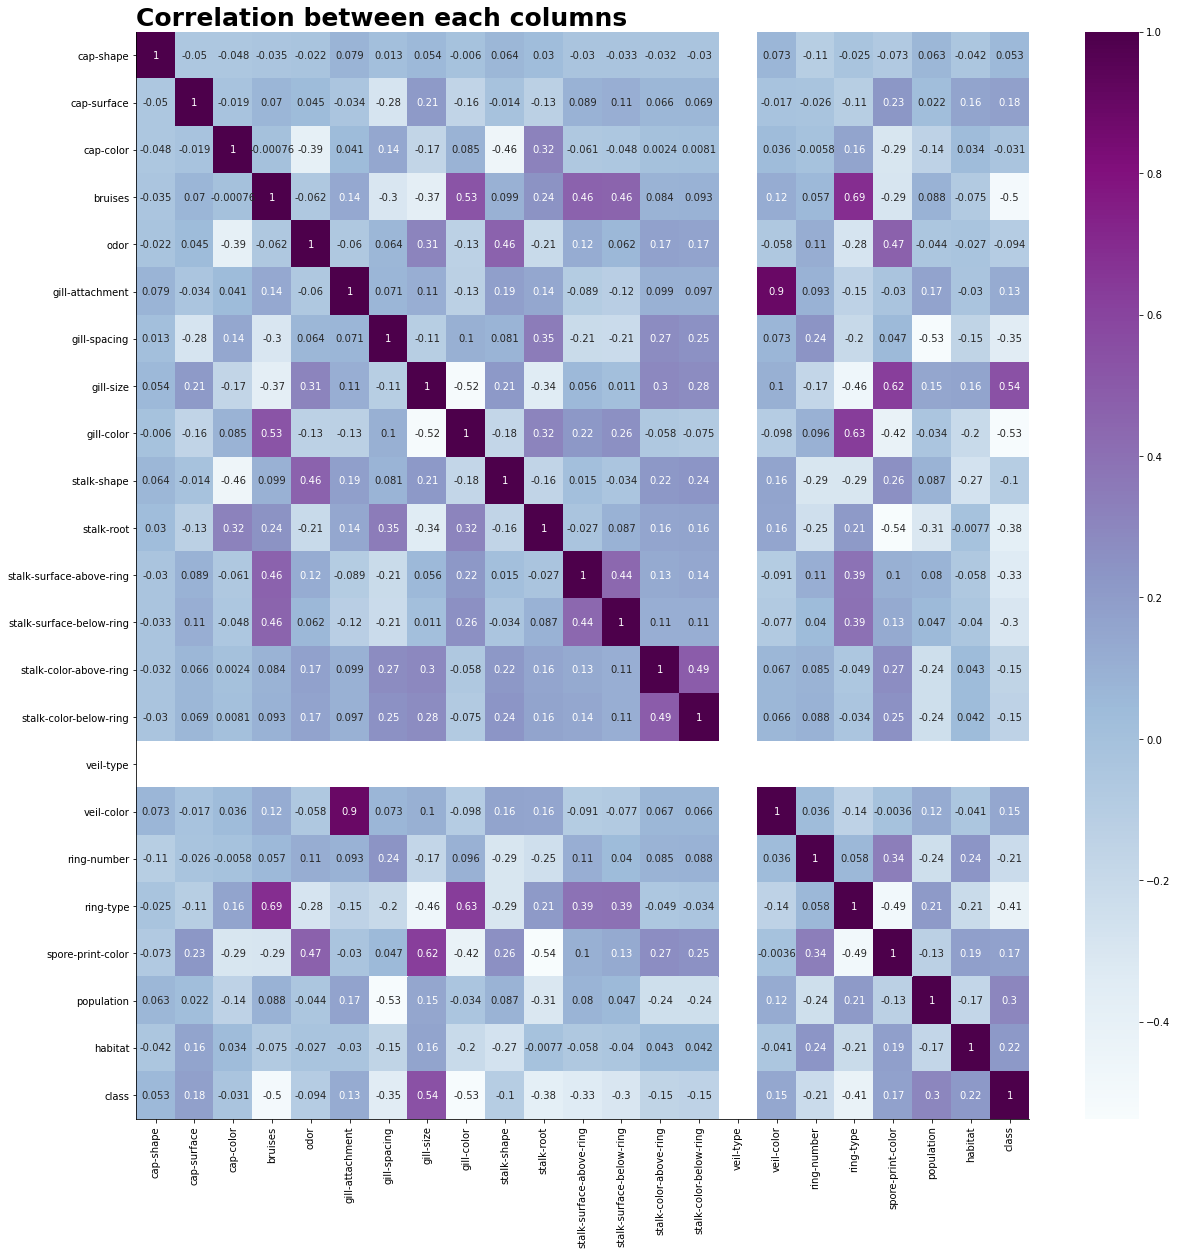

In [13]:
# Feature importance
plt.figure(figsize = (20, 20))
sns.heatmap(df_ordinal.corr(), cmap = "BuPu", annot = True)
plt.xticks()
plt.yticks()
plt.title('Correlation between each columns', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, loc = 'left')
sns.despine()
plt.show()

In [14]:
columns_X = ['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [15]:
# correlation between class and another columns
# from this we can see that the variable with the least and the most correlation is gill-size and gill-color.
corr = []
for column in columns_X:
    corr.append([column, df_ordinal['class'].corr(df_ordinal[column])])
    #print('Correlation between class and {} is {}'.format(column, df_ordinal['class'].corr(df_ordinal[column])))
corr = sorted(corr, key=lambda x : x[1])
for x in corr:
    print('Correlation between class and {} is {}'.format(x[0], x[1]))

KeyError: 'bruises%3F'

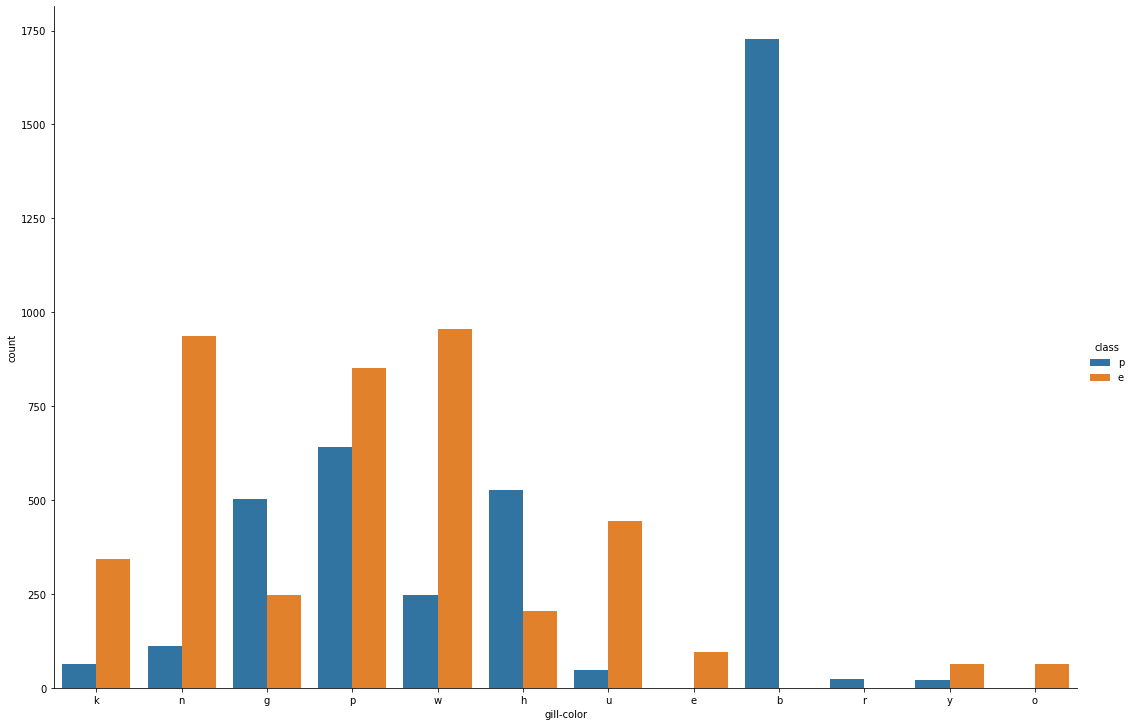

In [ ]:
# Distribution gill-color and class 
g = sns.catplot(x="gill-color"
                , hue="class"
                , data=df[['class','gill-color']]
                , kind="count"
                , height=10
                , aspect=1.5);

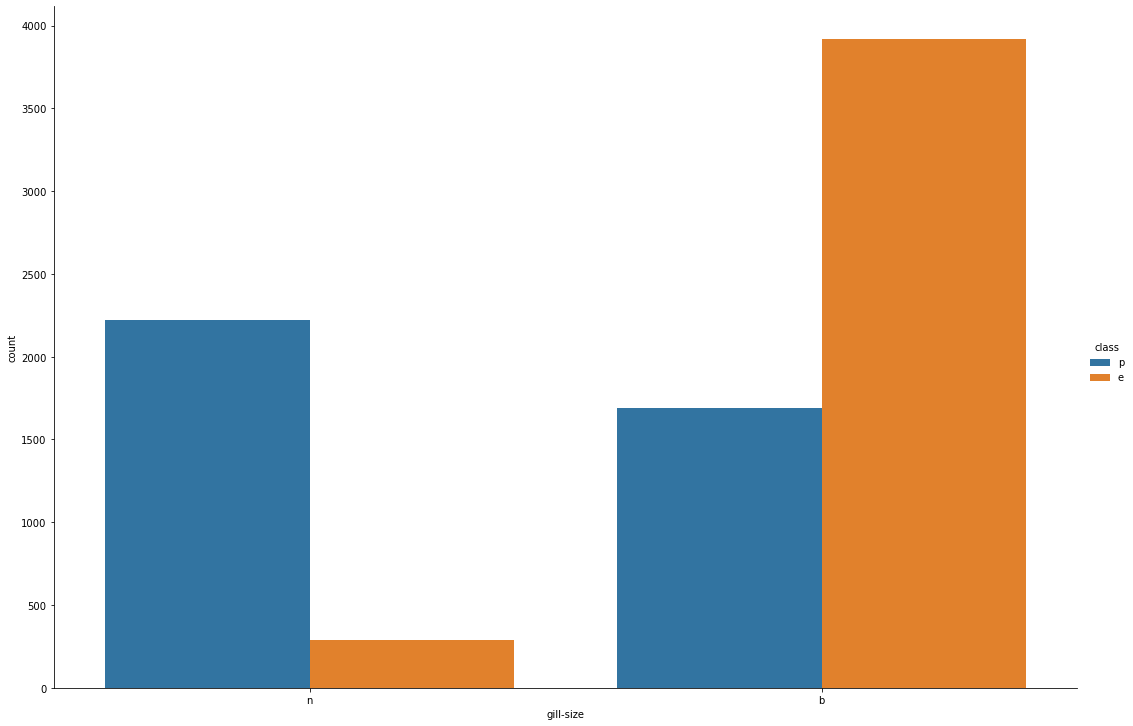

In [ ]:
# Distribution gill-size and class 
g = sns.catplot(x="gill-size"
                , hue="class"
                , data=df[['class','gill-size']]
                , kind="count"
                , height=10
                , aspect=1.5);

### Data Preparation

In [ ]:
# Getting X and y
X = df_ordinal[columns_X]
y = df_ordinal['class']

In [ ]:
# Splitting data
X_fulltrain, X_test, y_fulltrain, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_fulltrain, y_fulltrain, random_state=42, test_size=0.25)

### ML Model

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 99.96%


In [ ]:
y_test_hat=grid_search.predict(X_val) 

test_accuracy=accuracy_score(y_val,y_test_hat)*100

print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our validation dataset with tuning is : 99.88%


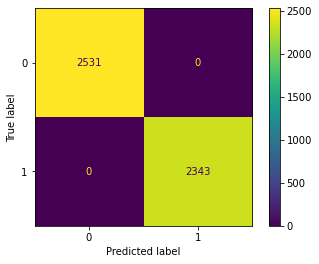

In [ ]:
plot_confusion_matrix(grid_search,X_train, y_train,values_format='d' )

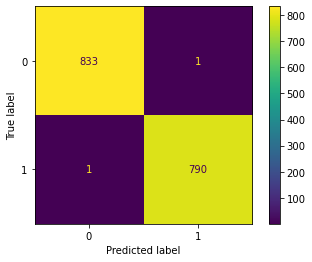

In [ ]:
plot_confusion_matrix(grid_search,X_val, y_val,values_format='d' )

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth':[None,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# defining parameter range
grid = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 38 candidates, totalling 380 fits


In [ ]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 100.00%


In [ ]:
y_test_hat=grid_search.predict(X_val) 

test_accuracy=accuracy_score(y_val,y_test_hat)*100

print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our validation dataset with tuning is : 100.00%


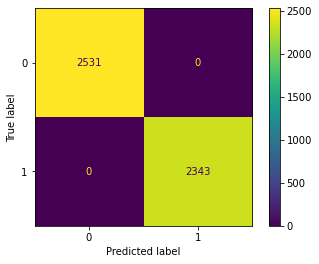

In [ ]:
plot_confusion_matrix(grid_search,X_train, y_train,values_format='d' )

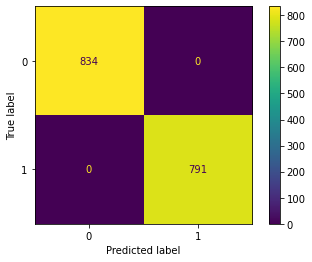

In [ ]:
plot_confusion_matrix(grid_search,X_val, y_val,values_format='d' )

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = { 
    'n_estimators': [50,100],
    'max_features': ['auto', 'sqrt', 'log2']
}

# defining parameter range
grid = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [ ]:
print(grid_search.best_params_)

{'max_features': 'auto', 'n_estimators': 50}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 100.00%


In [ ]:
y_test_hat=grid_search.predict(X_val) 

test_accuracy=accuracy_score(y_val,y_test_hat)*100

print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our validation dataset with tuning is : 100.00%


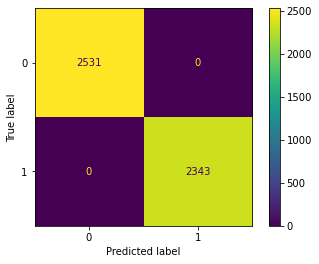

In [ ]:
plot_confusion_matrix(grid_search,X_train, y_train,values_format='d' )

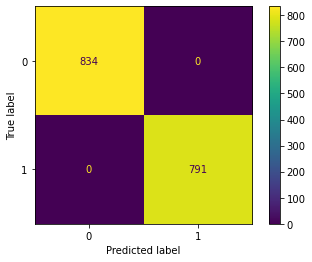

In [ ]:
plot_confusion_matrix(grid_search,X_val, y_val,values_format='d' )

### Save and Load Model

In [ ]:
#save model
filename = 'mushroom_model.pkl'
pickle.dump(grid_search, open(filename, 'wb'))

In [ ]:
cap_shape_dict = {"b":0,"c":1,"f":2,"k":3,"s":4,"x":5}
cap_surface_dict = {"f":0,"g":1,"s":2,"y":3}
cap_color_dict = {"b":0,"c":1,"e":2,"g":3,"n":4,"p":5,"r":6,"u":7,"w":8,"y":9}
bruises_dict = {"f":0,"t":1}
odor_dict = {"a":0,"c":1,"f":2,"l":3,"n":5,"p":6,"s":7,"y":8}
gill_attachment_dict = {"f":1}
gill_spacing_dict = {"c":0,"w":1}
gill_size_dict = {"b":0,"n":1}
gill_color_dict = {"b":0,"e":1,"g":2,"h":3,"k":4,"n":5,"p":7,"r":8,"u":9,"w":10}
stalk_shape_dict = {"e":0,"t":1}
stalk_root_dict = {"?":0,"b":1,"c":2,"e":3,"r":4}
stalk_surface_above_ring_dict = {"f":0,"k":1, "s":2}
stalk_surface_below_ring_dict = {"f":0,"k":1, "s":2, "y":3}
stalk_color_above_ring_dict = {"b":0,"e":2,"g":3,"n":4,"p":6,"w":7}
stalk_color_below_ring_dict = {"b":0,"e":2,"g":3,"n":4,"p":6,"w":7, "y":8}
veil_type_dict = {"p":0}
veil_color_dict = {"w":2}
ring_number_dict = {"o":1,"t":2}
ring_type_dict = {"e":0,"f":1,"l":2,"p":4}
spore_print_color_dict = {"h":1,"k":2,"n":3,"r":5,"u":6,"w":7}
population_dict = {"a":0,"c":1,"n":2,"s":3,"v":4,"y":5}
habitat_dict = {"d":0,"g":1,"l":2,"m":3,"p":4,"u":5, "w":6}

X_test = pd.read_csv('dataset_24_mushroom.csv')
X_test['cap-shape'] = X_test['cap-shape'].map(cap_shape_dict)
X_test['cap-surface'] = X_test['cap-surface'].map(cap_surface_dict)
X_test['cap-color'] = X_test['cap-color'].map(cap_color_dict)
X_test['bruises'] = X_test['bruises'].map(bruises_dict)
X_test['odor'] = X_test['odor'].map(odor_dict)
X_test['gill-attachment'] = X_test['gill-attachment'].map(gill_attachment_dict)
X_test['gill-spacing'] = X_test['gill-spacing'].map(gill_spacing_dict)
X_test['gill-size'] = X_test['gill-size'].map(gill_size_dict)
X_test['gill-color'] = X_test['gill-color'].map(gill_color_dict)
X_test['stalk-shape'] = X_test['stalk-shape'].map(stalk_shape_dict)
X_test['stalk-root'] = X_test['stalk-root'].map(stalk_root_dict)
X_test['stalk-surface-above-ring'] = X_test['stalk-surface-above-ring'].map(stalk_surface_above_ring_dict)
X_test['stalk-surface-below-ring'] = X_test['stalk-surface-below-ring'].map(stalk_surface_below_ring_dict)
X_test['stalk-color-above-ring'] = X_test['stalk-color-above-ring'].map(stalk_color_above_ring_dict)
X_test['stalk-color-below-ring'] = X_test['stalk-color-below-ring'].map(stalk_color_below_ring_dict)
X_test['veil-type'] = X_test['veil-type'].map(veil_type_dict)
X_test['veil-color'] = X_test['veil-color'].map(veil_color_dict)
X_test['ring-number'] = X_test['ring-number'].map(ring_number_dict)
X_test['ring-type'] = X_test['ring-type'].map(ring_type_dict)
X_test['spore-print-color'] = X_test['spore-print-color'].map(spore_print_color_dict)
X_test['population'] = X_test['population'].map(population_dict)
X_test['habitat'] = X_test['habitat'].map(habitat_dict)

X_test.head()
# for i in X_test.columns:
#     if i != 'class':
#         X_test[i] = str(i+"_dict")
#     else:
#         break
    

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6.0,1.0,0,1,4.0,0,...,7.0,7.0,0,2.0,1.0,4.0,2.0,3,5,p
1,5,2,9,1,0.0,1.0,0,0,4.0,0,...,7.0,7.0,0,2.0,1.0,4.0,3.0,2,1,e
2,0,2,8,1,3.0,1.0,0,0,5.0,0,...,7.0,7.0,0,2.0,1.0,4.0,3.0,2,3,e
3,5,3,8,1,6.0,1.0,0,1,5.0,0,...,7.0,7.0,0,2.0,1.0,4.0,2.0,3,5,p
4,5,2,3,0,5.0,1.0,1,0,4.0,1,...,7.0,7.0,0,2.0,1.0,0.0,3.0,0,1,e


In [ ]:
X_test.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')